In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, GaussianNoise
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

### Data load
#### Data description: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/wine.csv'
df = pd.read_csv(url, header=None)

### Data shuffling and sampling

In [3]:
df = df.sample(frac=1.0,random_state=2)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


### Model structure: Basline model

In [4]:
def WineModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)


### Experiment setting

In [5]:
Npatience = 10
Nepochs = 200
Nbatch = 200

### Model save directory setting

In [6]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model training

In [7]:
ModelSaveSameName = save_path+'WineM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)
EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience)


Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWine = Wine.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs, batch_size=Nbatch,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/200
26/26 [==============================] - 2s 59ms/step - loss: 0.3223 - accuracy: 0.8445 - val_loss: 0.2615 - val_accuracy: 0.9123

Epoch 00001: val_loss improved from inf to 0.26149, saving model to ./Results\WineM.hdf5
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2181 - accuracy: 0.9300 - val_loss: 0.2459 - val_accuracy: 0.9192

Epoch 00002: val_loss improved from 0.26149 to 0.24593, saving model to ./Results\WineM.hdf5
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9259 - val_loss: 0.2369 - val_accuracy: 0.9185

Epoch 00003: val_loss improved from 0.24593 to 0.23691, saving model to ./Results\WineM.hdf5
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1897 - accuracy: 0.9403 - val_loss: 0.2226 - val_accuracy: 0.9323

Epoch 00004: val_loss improved from 0.23691 to 0.22262, saving model to ./Results\WineM.hdf5
Epoch 5/200
26/26 [==============================] - 0s 4ms/ste

### Plot loss graphs

Text(0, 0.5, 'loss')

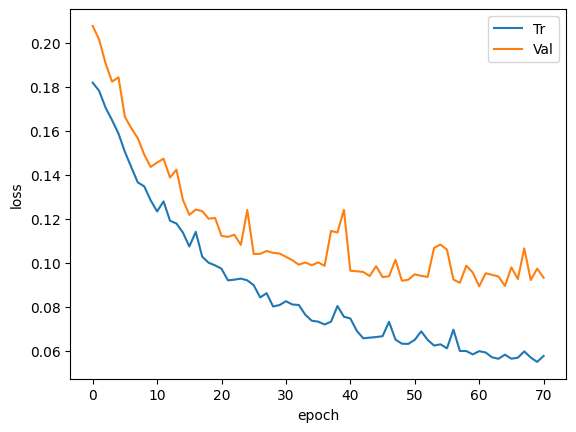

In [8]:
StartIDX = 5
plt.plot(HistWine.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWine.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: Dropout model

In [9]:
DRate = 0.05

def WineDropOutModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden1 = Dropout(DRate)(Hidden1)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden2 = Dropout(DRate)(Hidden2)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Hidden3 = Dropout(DRate)(Hidden3)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

### Model training

In [10]:
ModelSaveSameName = save_path+'WineDRM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

WineDRM = WineDropOutModel()
WineDRM.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineDRM = WineDRM.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/200
26/26 [==============================] - 0s 8ms/step - loss: 2.1596 - accuracy: 0.4425 - val_loss: 0.7762 - val_accuracy: 0.7531

Epoch 00001: val_loss improved from inf to 0.77620, saving model to ./Results\WineDRM.hdf5
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.8472 - accuracy: 0.7384 - val_loss: 0.3385 - val_accuracy: 0.8869

Epoch 00002: val_loss improved from 0.77620 to 0.33848, saving model to ./Results\WineDRM.hdf5
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 0.5296 - accuracy: 0.8004 - val_loss: 0.3199 - val_accuracy: 0.9054

Epoch 00003: val_loss improved from 0.33848 to 0.31989, saving model to ./Results\WineDRM.hdf5
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.8244 - val_loss: 0.3188 - val_accuracy: 0.9062

Epoch 00004: val_loss improved from 0.31989 to 0.31877, saving model to ./Results\WineDRM.hdf5
Epoch 5/200
26/26 [==============================] - 0s 

### Plot loss graphs

Text(0, 0.5, 'loss')

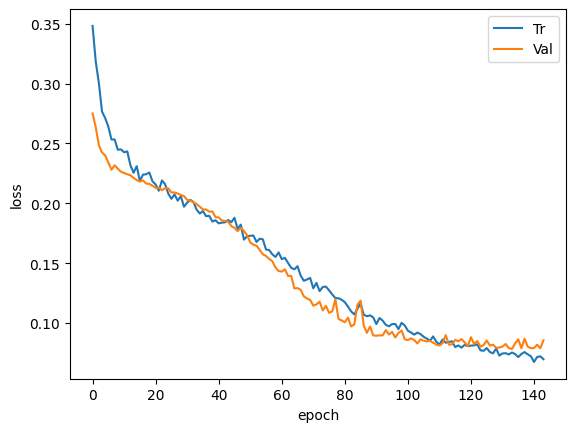

In [11]:
StartIDX = 5
plt.plot(HistWineDRM.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWineDRM.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: Gaussian noise model

In [12]:
std = 0.05

def WineGNModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = GaussianNoise(std)(Inp)
    Hidden1 = GaussianNoise(std)(Hidden1)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden2 = GaussianNoise(std)(Hidden2)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Hidden3 = GaussianNoise(std)(Hidden3)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

### Model training

In [13]:
ModelSaveSameName = save_path+'WineGNM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

WineGNM = WineDropOutModel()
WineGNM.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineGNM = WineGNM.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/200
26/26 [==============================] - 0s 9ms/step - loss: 0.6011 - accuracy: 0.7661 - val_loss: 0.3136 - val_accuracy: 0.9108

Epoch 00001: val_loss improved from inf to 0.31357, saving model to ./Results\WineGNM.hdf5
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.3797 - accuracy: 0.8659 - val_loss: 0.2859 - val_accuracy: 0.9100

Epoch 00002: val_loss improved from 0.31357 to 0.28586, saving model to ./Results\WineGNM.hdf5
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 0.3311 - accuracy: 0.8735 - val_loss: 0.2682 - val_accuracy: 0.9223

Epoch 00003: val_loss improved from 0.28586 to 0.26817, saving model to ./Results\WineGNM.hdf5
Epoch 4/200
26/26 [==============================] - 0s 6ms/step - loss: 0.3120 - accuracy: 0.8813 - val_loss: 0.2562 - val_accuracy: 0.9231

Epoch 00004: val_loss improved from 0.26817 to 0.25625, saving model to ./Results\WineGNM.hdf5
Epoch 5/200
26/26 [==============================] - 0s 

### Plot loss graphs

Text(0, 0.5, 'loss')

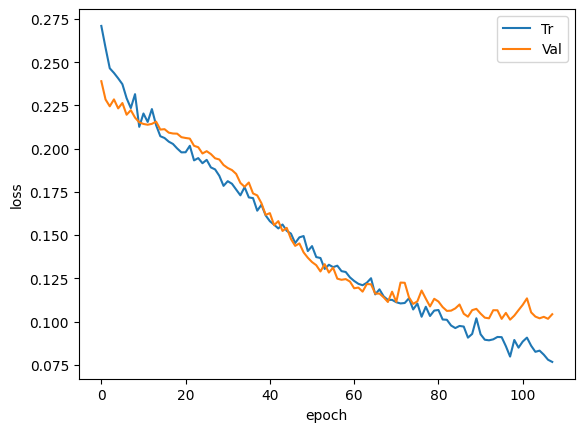

In [14]:
StartIDX = 5
plt.plot(HistWineGNM.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWineGNM.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Accuracy difference between regularized and unregularized models

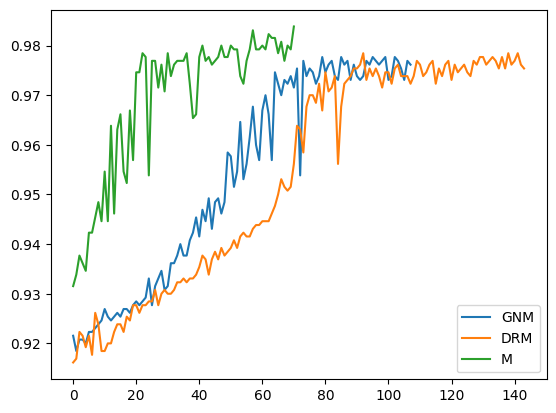

In [15]:
plt.plot(HistWineGNM.history['val_accuracy'][StartIDX:],  label='GNM')
plt.plot(HistWineDRM.history['val_accuracy'][StartIDX:],  label='DRM')

plt.plot(HistWine.history['val_accuracy'][StartIDX:],  label='M')
plt.legend()